In [171]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest, chi2
# from Learning_Curve import plot_learning_curve

x_train_original = pd.read_csv("../data/COMP30027_2021_Project2_datasets/recipe_train.csv", index_col = False, delimiter = ',', header=0)
oversample = RandomOverSampler(sampling_strategy='minority')

train_label = x_train_original.loc[:,'duration_label']
X_train, X_test, y_train, y_test = train_test_split(x_train_original,train_label, test_size=0.4, stratify=train_label, random_state=42)



# First random oversampling, bring count of class 3 to be equal to the highest class count.
X_oversampled, y_oversampled = oversample.fit_resample(X_train, y_train)


# Second random oversampling, bring the count of class 2 to be equal to the other 2 classes
X_oversampled, y_oversampled = oversample.fit_resample(X_oversampled, y_oversampled)

# .value_counts()
# use recipe name as an example
train_corpus = X_oversampled.loc[:,['name','steps','ingredients']]
test_corpus = X_test.loc[:,['name','steps','ingredients']]
train_corpus

,name,steps,ingredients
0,please ignore,['none'],"['egg', 'water']"
1,caramelized onion and asiago beer batter bread,"['preheat oven to 375', 'heat olive oil in a l...","['olive oil', 'onions', 'sugar', 'flour', 'bak..."
2,spicy ranch burgers,"['prepare spicy seasoning mix', 'store in airt...","['80% lean ground beef', 'spicy seasoning mix'..."
3,choc pecan cookies gluten free,"['preheat the oven to 180c', 'grease oven tray...","['pecan pieces', 'butter', 'caster sugar', 'va..."
4,mahi mahi polynesian style,"['preheat oven to 350 degrees', 'mix together ...","['mahi mahi fillet', 'soy sauce', 'pineapple c..."
...,...,...,...
36439,pho bo beef noodle soup,['make the broth by bringing the stock to a bo...,"['flat rice noodles', 'bean sprouts', 'shallot..."
36440,asian sesame cucumber salad,['peel and seed cucumbers and cut on the diago...,"['cucumbers', 'kosher salt', 'white sesame see..."
36441,potatoes with bacon and onion,"['boil the potatoes till tender , drain and sl...","['potatoes', 'onion', 'olive oil', 'smoked bac..."
36442,cowboy cookies a judy paige presentation,"['preheat oven to 350-degrees', 'melt butter a...","['butter', 'sugar', 'brown sugar', 'vanilla', ..."


In [104]:


# Joining columns for train
train_corpus['steps'] = train_corpus['steps'].apply(eval)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(eval)
train_corpus['steps'] = train_corpus['steps'].apply(' '.join)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(' '.join)


# Joining columns for test
test_corpus['steps'] = test_corpus['steps'].apply(eval)
test_corpus['ingredients'] = test_corpus['ingredients'].apply(eval)
test_corpus['steps'] = test_corpus['steps'].apply(' '.join)
test_corpus['ingredients'] = test_corpus['ingredients'].apply(' '.join)

# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)


In [32]:
test_corpus

,name,steps,ingredients
35368,pressure cooker bbq barbecue pork sandwiches,saute chopped onions in butter mix onions with...,butter green onion onion sugar salt paprika wo...
34594,oven potatoes,grease a baking tray wash potatoes and cut in ...,potatoes olive oil salt
3638,octopus stew,"in large pot boil the macaroni , in salted wat...",beef hot dogs macaroni butter velveeta cheese ...
17321,cornbread beef casserole,preheat oven to 450f brown the onion add groun...,onion ground beef salt chili powder worcesters...
19439,swordfish steaks with dill mustard sauce,"in large skillet , heat italian dressing and c...",italian dressing swordfish steaks dry white wi...
...,...,...,...
11397,bora bora sangria,"mix brandy , wine , curacao , fruits and cinna...",spanish brandy red wine orange curacao orange ...
7856,tomato sauce for chicago style pizza,"place the tomatoes , including the juice from ...",italian-style peeled tomatoes dried oregano ko...
31460,peachy chicken,"drain 2 can peaches , reserve liquid brown ski...",peaches skinless chicken pieces vegetable oil ...
15536,pepperoncini chuck roast,"in crockpot put chuck roast , onion soup mix ,...",chuck roast onion soup mix italian seasoning o...


### Putting the features of all instances into a Bag of Words
Used to make CountVec and TF-IDF Sparse matrix

In [105]:

all_words = []

for i in range (0, len(train_corpus['steps'])):
    s = ''
    s += train_corpus.loc[i,'name'] + train_corpus.loc[i, 'steps'] + train_corpus.loc[i, 'ingredients']
    all_words.append(s)
    

In [106]:


test_corpus = test_corpus.reset_index()
all_words_test = []

for j in range (0, len(test_corpus['steps'])):
#     print(j)
    s = ''
    s += test_corpus.loc[j,'name'] + test_corpus.loc[j, 'steps'] + test_corpus.loc[j, 'ingredients']
    all_words_test.append(s)
    
all_words_test

['pressure cooker bbq barbecue pork sandwichessaute chopped onions in butter mix onions with all the remaining ingredients in large sauce pan and simmer for 2 hours stirring occasionally while the sauce is simmering pressure cook a 6 pound pork butt till it falls apart according to pressure cooker cookbook about 2 hours cool and hand shredd to serve , place a large handful of meat on the bun and top with a generous amount of bbq sauce left over sauce can be frozen for up to 2 months or you can mix sauce with any left over pork and freeze for sandwichesbutter green onion onion sugar salt paprika worcestershire sauce tomato sauce ketchup cider vinegar celery seeds dry mustard pepper',
 'oven potatoesgrease a baking tray wash potatoes and cut in half crisscross the halfs with a knife on the bottom side sprinkle cuminseeds or paprika on the baking tray and place the potatoes on top put bits of butter or drops of oil on the potatoes sprinkel with salt and cuminseeds or paprika leave in oven

In [192]:
from sklearn.feature_extraction.text import CountVectorizer
# stop_word ='english' means deleting some common words like the, a,.... in list 'english'



vectorizer = CountVectorizer(stop_words='english', max_features = 100)
X = vectorizer.fit(all_words)
vocab_dict = vectorizer.vocabulary_
vocab = np.array(vectorizer.get_feature_names())

X_final = vectorizer.transform(all_words)
X_final.shape
# len(vocab)
# select = SelectKBest(chi2, k=500)
# X_final = select.fit_transform(X_final, y_oversampled)

(36444, 100)

In [178]:
X_final.shape

(36444, 500)

In [193]:
vectorizer_t = CountVectorizer(stop_words='english', max_features = 100)
X_t = vectorizer_t.fit(all_words_test)
vocab_dict = vectorizer_t.vocabulary_
# vocab = np.array(vectorizer.get_feature_names())

X_t_final = vectorizer_t.transform(all_words_test)
# X_t_final = select.transform(X_t_final)
X_t_final.shape

(16000, 100)

### TF-IDF

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(stop_words='english', max_features = 1000)
X_tfidf = tf_idf.fit(all_words)
# vocab = np.array(vectorizer.get_feature_names())

X_tfidf = tf_idf.transform(all_words)
# y_oversampled.shape
tf_idf.idf_

array([2.52011978, 5.73836845, 3.62616237, 4.7665926 , 5.68051366,
       5.60092622, 2.93225704, 5.79644929, 5.41906014, 3.10155277,
       4.97560164, 3.91169784, 2.89396951, 5.22691606, 5.76055637,
       4.55947235, 3.17438411, 4.09079554, 4.38879011, 5.13537237,
       4.374262  , 4.53847921, 5.24589197, 5.53741281, 3.98875979,
       5.51459814, 5.03741483, 5.14571729, 5.40773499, 5.39876632,
       4.31363738, 1.52352771, 5.49967249, 4.40353239, 5.7044669 ,
       4.31741525, 4.92708998, 5.71359938, 5.8165842 , 5.30915416,
       5.61191534, 3.7853186 , 5.09667957, 5.09338467, 4.82773633,
       5.33604306, 4.71458781, 4.13332891, 4.91463308, 5.77021828,
       4.72250193, 5.84059907, 4.12330377, 5.88678846, 3.09461995,
       5.86520488, 5.31119706, 5.14745189, 4.92987939, 4.13081319,
       4.32425158, 6.07421392, 2.23024438, 4.46477601, 2.50245983,
       4.87816719, 4.72250193, 5.12683261, 5.03741483, 5.51209501,
       4.90641385, 6.10088217, 5.92761045, 5.6456264 , 3.81602

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_t = TfidfVectorizer(stop_words='english', max_features = 1000)
X_tfidf_test = tf_idf_t.fit(all_words_test)

X_tfidf_ftest = tf_idf_t.transform(all_words_test)
X_tfidf_ftest.shape

(16000, 1000)

### Linear SVM

In [189]:
from sklearn import svm

LinearSVC_clf = svm.LinearSVC(dual=False, multi_class='ovr', random_state=0)

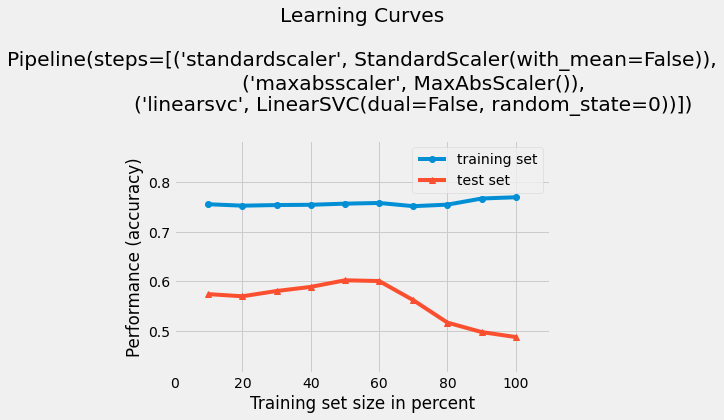

In [194]:
SVC_clf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf)
plot_learning_curves(X_final, y_oversampled, X_t_final, y_test, SVC_clf, scoring= 'accuracy')
plt.show()

In [195]:

SVC_clf.fit(X_final, y_oversampled)

y_test_predict = SVC_clf.predict(X_t_final)
y_train_predict = SVC_clf.predict(X_final)
print(accuracy_score(y_test, y_test_predict))
print(accuracy_score(y_oversampled, y_train_predict))
print(classification_report(y_test, y_test_predict))
cm = confusion_matrix(y_test, y_test_predict)
cm

0.4878125
0.7698660959279992
              precision    recall  f1-score   support

         1.0       0.67      0.62      0.65      7082
         2.0       0.75      0.38      0.51      8098
         3.0       0.06      0.36      0.10       820

    accuracy                           0.49     16000
   macro avg       0.49      0.46      0.42     16000
weighted avg       0.68      0.49      0.55     16000



array([[4392,  920, 1770],
       [1758, 3117, 3223],
       [ 386,  138,  296]], dtype=int64)

In [153]:
# Cross Validation To evaluate model
# Shuffle Split is a random split method, not guranteed unique split but likely on large data.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=42)
scores = cross_val_score(LinearSVC_clf, X_final, y_oversampled, cv=cv)
scores

array([0.77788448, 0.78007957, 0.77870764, 0.77651255, 0.77630676])

### Not using Gaussian Naive Bayes Classifier
GNB was not implemented itself as we deemed it unfit for this classification task, 2 main reasons.
1) Features cannot be assumed to be indepedent from one another, for example ingredients can appear in the name, and or steps   
2) Blah blah blah

### Learning curve for SGD Classifier

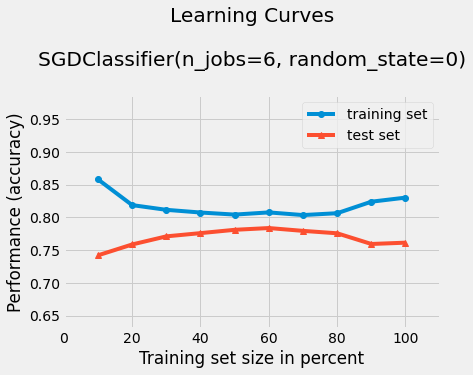

In [52]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=6, random_state=0)
plot_learning_curves(X_final, y_oversampled, X_t_final, y_test, clf_SGD, scoring= 'accuracy')
plt.show()

In [53]:
SGD = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(),clf_SGD)
SGD.fit(X_final, y_oversampled)

y_test_predict_SGD = SGD.predict(X_t_final)
y_train_predict_SGD = SGD.predict(X_final)
print("test: ", accuracy_score(y_test, y_test_predict_SGD))
print("train: ", accuracy_score(y_oversampled, y_train_predict_SGD))
print(classification_report(y_test, y_test_predict_SGD))
cm = confusion_matrix(y_test, y_test_predict_SGD)
cm
X_train.shape

test:  0.7624375
train:  0.8260344638349248
              precision    recall  f1-score   support

         1.0       0.76      0.80      0.78      7082
         2.0       0.84      0.72      0.78      8098
         3.0       0.43      0.86      0.57       820

    accuracy                           0.76     16000
   macro avg       0.68      0.79      0.71     16000
weighted avg       0.79      0.76      0.77     16000



(24000, 6)

### Stacking Implementation

In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


estimators = [
     ('CountVecSVC', SVC_clf),
     ('SGD', SGD)]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(n_jobs=6, random_state=0), n_jobs=6)

stacking_clf.fit(X_final, y_oversampled)


y_test_predict_stack = stacking_clf.predict(X_t_final)
y_train_predict_stack = stacking_clf.predict(X_final)
print(accuracy_score(y_test, y_test_predict_stack))
print(accuracy_score(y_oversampled, y_train_predict_stack))
print(classification_report(y_test, y_test_predict_stack))
cm = confusion_matrix(y_test, y_test_predict_stack)
cm


0.769125
0.8295467017890462
              precision    recall  f1-score   support

         1.0       0.76      0.81      0.78      7082
         2.0       0.84      0.73      0.78      8098
         3.0       0.47      0.81      0.59       820

    accuracy                           0.77     16000
   macro avg       0.69      0.78      0.72     16000
weighted avg       0.79      0.77      0.77     16000



array([[5743, 1013,  326],
       [1762, 5896,  440],
       [  67,   86,  667]], dtype=int64)

### Running model on REAL Test data

In [140]:
import scipy
final_test = scipy.sparse.load_npz('CountVec.npz')

# stacking_clf.fit(X_train, y_train)
LinearSVC_real_test_pred = SVC_clf.predict(final_test)
LinearSVC_real_test_pred
# final_test.shape



array([3., 1., 3., ..., 3., 3., 2.])

In [141]:
a = [x for x in range(1,10001)]

result = {
    'id': a,
    'duration_label': real_test_pred
}
result = pd.DataFrame(result)
result.to_csv('result.csv', index = False)